# Explanation of features and targets

#### Features
- IntersectionId: Represents a unique intersectionID for some intersection of roads within a city.
- Latitude: The latitude of the intersection.
- Longitude: The longitude of the intersection.
- EntryStreetName: The street name from which the vehicle entered towards the intersection.
- ExitStreetName: The street name to which the vehicle exits from the intersection.
- EntryHeading: Direction in which the car was heading while entering the intersection.
- ExitHeading: Direction in which the car goes as it exits the intersection.
- Hour: The hour of the day. (0-23)
- Weekend: Binary indication of whether it is was a weekend (0/1)
- Month: Which month is it
- Path: Concatenation of: EntryStreetName_EntryHeading ExitStreetName_ExitHeading.
- City: Name of the city


#### Target
- TotalTimeStopped_p20: Total time for which 20% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p40: Total time for which 40% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p50: Total time for which 50% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p60: Total time for which 60% of the vehicles had to stop at an intersection.
- TotalTimeStopped_p80: Total time for which 80% of the vehicles had to stop at an intersection.
- TimeFromFirstStop_p20: Time taken for 20% of the vehicles to stop again after crossing an intersection.
- TimeFromFirstStop_p40: Time taken for 40% of the vehicles to stop again after crossing an intersection.
- TimeFromFirstStop_p50: Time taken for 50% of the vehicles to stop again after crossing an intersection.
- TimeFromFirstStop_p60: Time taken for 60% of the vehicles to stop again after crossing an intersection.
- TimeFromFirstStop_p80: Time taken for 80% of the vehicles to stop again after crossing an intersection.
- DistanceToFirstStop_p20: How far before the intersection 20% of the vehicles stopped for the first time.
- DistanceToFirstStop_p40: How far before the intersection 40% of the vehicles stopped for the first time.
- DistanceToFirstStop_p50: How far before the intersection 50% of the vehicles stopped for the first time.
- DistanceToFirstStop_p60: How far before the intersection 60% of the vehicles stopped for the first time.
- DistanceToFirstStop_p80: How far before the intersection 80% of the vehicles stopped for the first time.

# Import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
print(df_train.shape)
print(df_test.shape)
# train and test sets have different features (indicated by different number of columns)

(856387, 28)
(1921357, 13)


# Visualization of data

In [4]:
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [5]:
df_train.groupby(["City"]).nunique()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p20,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80
City,,,,,,,,,,,,,,,,,,,,,
Atlanta,156484,377,375,377,292,292,8,8,24,2,...,192,272,301,336,355,1642,3035,3982,5566,9134
Boston,178617,975,975,974,574,568,8,8,24,2,...,190,257,287,325,355,1517,2267,2630,3275,4714
Chicago,131049,2135,2134,2135,411,411,8,8,24,2,...,183,243,262,301,352,1621,2348,2659,3301,4563
Philadelphia,390237,1318,1315,1318,474,460,8,8,24,2,...,183,255,286,329,355,3148,5885,7038,8804,11783


In [6]:
# missing data
df_train.isna().sum(axis=0)

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

,City,train,test
2,Chicago,131049,298129
0,Atlanta,156484,341852
1,Boston,178617,409275
3,Philadelphia,390237,872101


<AxesSubplot:xlabel='City', ylabel='value'>

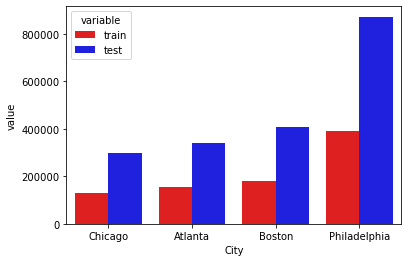

In [15]:
# Check number of observations per city to see how similar distribution of data is per city 
train_city = df_train.groupby('City').size().reset_index().rename(columns={0:'train'})
test_city = df_test.groupby('City').size().reset_index().rename(columns={0:'test'})

data = train_city.merge(test_city, on='City').sort_values('test')
display (data)

sns.barplot(x='City',y='value',hue='variable',data=data.melt(id_vars='City', value_vars=['train','test']), palette=['red', 'blue'])

,City,train,test
0,Atlanta,377,468
1,Boston,975,1192
3,Philadelphia,1318,1715
2,Chicago,2135,2567


<AxesSubplot:xlabel='City', ylabel='value'>

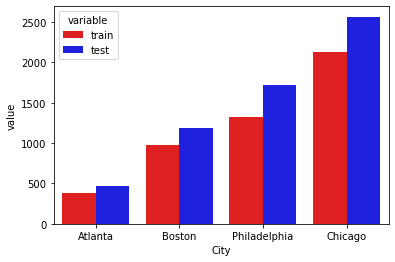

In [16]:
# Check number of intersections per City to see how similar distribution of data is per city 
train_intersection = df_train[['City', 'IntersectionId']].drop_duplicates().groupby('City').size().reset_index().rename(columns={0:'train'})
test_intersection = df_test[['City', 'IntersectionId']].drop_duplicates().groupby('City').size().reset_index().rename(columns={0:'test'})

data = train_intersection.merge(test_intersection, on='City').sort_values('train')
display(data)

sns.barplot(x='City',y='value',hue='variable',data=data.melt(id_vars='City', value_vars=['train','test']), palette=['red', 'blue'])

,Month,train,test
0,1,825,1725
1,5,175,345
2,6,109760,248749
3,7,110750,249488
4,8,122755,275063
5,9,124686,278813
6,10,133489,296985
7,11,124739,280501
8,12,129208,289688


<AxesSubplot:xlabel='Month', ylabel='value'>

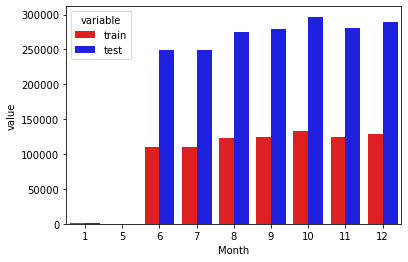

In [17]:
# Check number of observation per Month 
train_months = df_train.groupby('Month').size().reset_index().rename(columns={0:'train'})
test_months = df_test.groupby('Month').size().reset_index().rename(columns={0:'test'})

data = train_months.merge(test_months, on='Month')
display(data)

sns.barplot(x='Month',y='value',hue='variable',data=data.melt(id_vars='Month', value_vars=['train','test']), palette=['red', 'blue'])

January has a very small amount of data. February - May have zero data.

<AxesSubplot:xlabel='Hour', ylabel='value'>

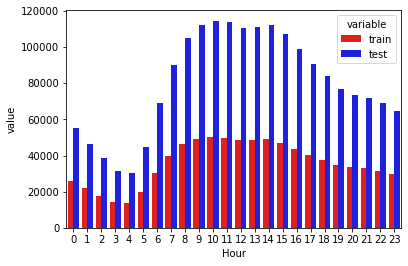

In [18]:
# Check number of observation per Hour
train_hours = df_train.groupby('Hour').size().reset_index().rename(columns={0:'train'})
test_hours = df_test.groupby('Hour').size().reset_index().rename(columns={0:'test'})

data = train_hours.merge(test_hours, on='Hour')
#display(data)

sns.barplot(x='Hour',y='value',hue='variable',data=data.melt(id_vars='Hour', value_vars=['train','test']), palette=['red', 'blue'])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


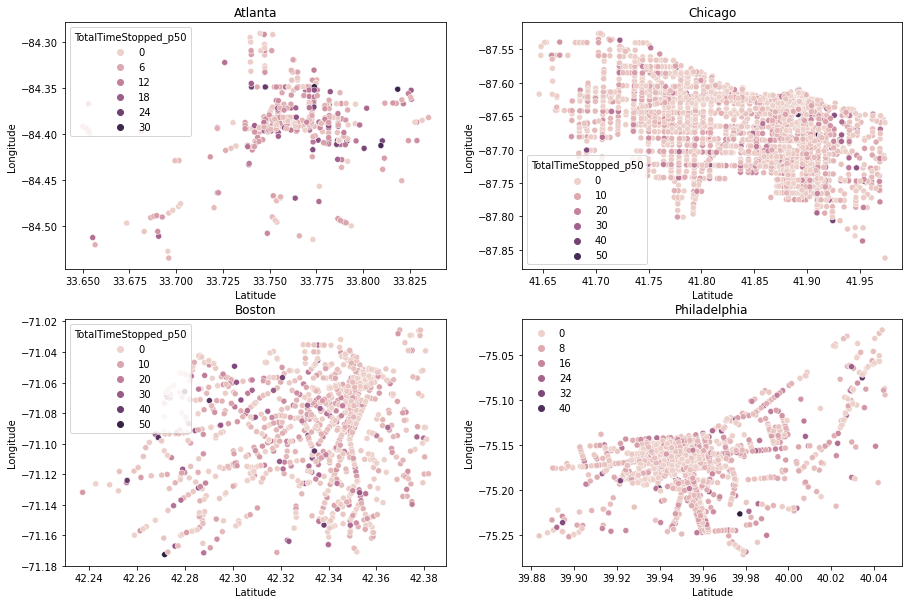

In [32]:
data = df_train.groupby(['City','IntersectionId','Latitude','Longitude']).agg({'TotalTimeStopped_p50':'mean'}).reset_index()

fig,axes=plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i,city in enumerate(data['City'].unique().tolist()):   
    scatter_plot = sns.scatterplot(x='Latitude',y='Longitude',data=data[data['City']==city],hue='TotalTimeStopped_p50',ax=axes[i%2,i//2],legend=True)
    legend = plt.legend(frameon=False)
    axes[i%2,i//2].set_title(city)
    axes[i%2,i//2].set_xlabel('Latitude')
    axes[i%2,i//2].set_ylabel('Longitude')

Text(0.5, 0.98, 'Hourly Traffic on Weekdays')

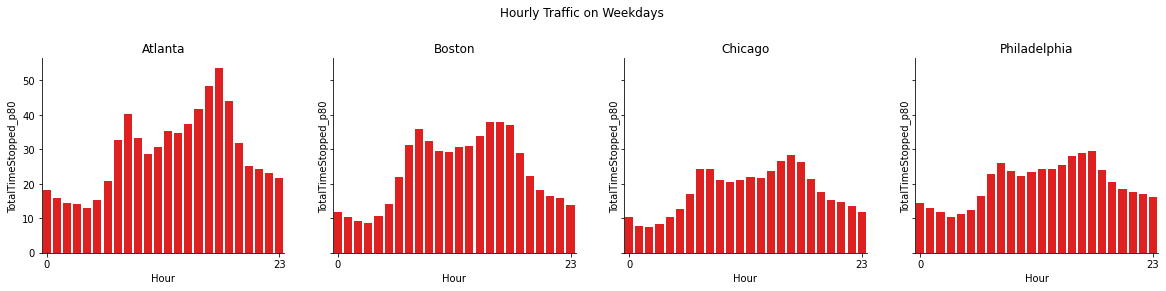

In [37]:
# Hourly Traffic per City on Weekdays using 80 percentile 
data = df_train[df_train['Weekend']==0].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='red')
    axes[i].set_ylabel('TotalTimeStopped_p80')
    axes[i].set_title(city)
    axes[i].set_xlabel('Hour')
    axes[i].get_xaxis().set_ticks([0, 23])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekdays')

Text(0.5, 0.98, 'Hourly Traffic on Weekends')

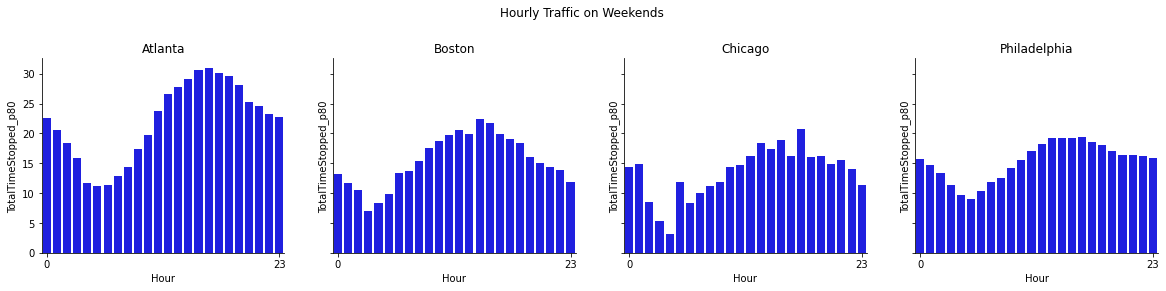

In [38]:
# Hourly Traffic per City on Weekends using 80 percentile 
data = df_train[df_train['Weekend']==1].groupby(['City','Hour']).agg({'TotalTimeStopped_p80':'mean'}).reset_index()

fig,axes = plt.subplots(nrows=1, ncols=data['City'].nunique(), figsize=(20,4), sharey=True)
for i,city in enumerate(data['City'].unique()):
    sns.barplot(data=data[data['City']==city] ,x='Hour', y='TotalTimeStopped_p80',ax=axes[i], color='blue')
    axes[i].set_ylabel('TotalTimeStopped_p80')
    axes[i].set_title(city)
    axes[i].set_xlabel('Hour')
    axes[i].get_xaxis().set_ticks([0, 23])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.subplots_adjust(top=0.8)
fig.suptitle('Hourly Traffic on Weekends')

In [39]:
# types of streets
data = df_train[['City','EntryStreetName','IntersectionId']].drop_duplicates()
print("Number of Avenues :", data['EntryStreetName'].str.contains('Avenue').sum())
print("Number of Streets :", data['EntryStreetName'].str.contains('Street').sum())
print("Number of Boulevards :", data['EntryStreetName'].str.contains('Boulevard').sum())
print("Number of Roads:", data['EntryStreetName'].str.contains('Road').sum())
print("Number of Highways :", data['EntryStreetName'].str.contains('Highway').sum())
print("Number of Drives :", data['EntryStreetName'].str.contains('Drive').sum())
print("Number of Parkways :", data['EntryStreetName'].str.contains('Parkway').sum())

Number of Avenues : 2420
Number of Streets : 4451
Number of Boulevards : 471
Number of Roads: 427
Number of Highways : 27
Number of Drives : 347
Number of Parkways : 91


In [40]:
# possible EntryHeading & ExitHeading values
print(df_train['EntryHeading'].unique())
print(df_train['ExitHeading'].unique())

['NW' 'SE' 'NE' 'SW' 'E' 'W' 'N' 'S']
['NW' 'SE' 'NE' 'SW' 'W' 'E' 'N' 'S']


# Preprocessing

The type of street can, and is expected to, affect traffic as smaller roads tend to be busier. Additionally, the type of road has some relevance as to where it is located and how wide it is (i.e., how many lanes it may have).

In [41]:
str_code = ['Avenue','Street','Boulevard','Road','Highway','Drive','Parkway','Square','Way','Ave','St','Pkwy','Lane','Circle','Place','Other']
str_name = ['Avenue','Street','Boulevard','Road','Highway','Drive','Parkway','Square','Way','Avenue','Street','Parkway','Lane','Circle','Place','Other']

for st in range(len(str_code)):
    df_train.loc[~(df_train['EntryStreetName'].isna()) & (df_train['EntryStreetName'].str.contains(str_code[st])), 'EntryStreetType'] = str_name[st]
    df_train.loc[~(df_train['ExitStreetName'].isna()) & (df_train['ExitStreetName'].str.contains(str_code[st])), 'ExitStreetType'] = str_name[st]
    df_test.loc[~(df_test['EntryStreetName'].isna()) & (df_test['EntryStreetName'].str.contains(str_code[st])), 'EntryStreetType'] = str_name[st]
    df_test.loc[~(df_test['ExitStreetName'].isna()) & (df_test['ExitStreetName'].str.contains(str_code[st])), 'ExitStreetType'] = str_name[st]
    
df_train['EntryStreetType'].fillna('Other',inplace=True)
df_train['ExitStreetType'].fillna('Other',inplace=True)

df_test['EntryStreetType'].fillna('Other',inplace=True)
df_test['ExitStreetType'].fillna('Other',inplace=True)

In [42]:
# Count for each street type
df_train[['City','EntryStreetType','IntersectionId']].drop_duplicates().groupby('EntryStreetType',dropna=False).size().sort_values()

EntryStreetType
Circle          5
Lane            5
Square         18
Place          20
Way            22
Highway        26
Parkway        90
Other         238
Drive         301
Road          381
Boulevard     444
Avenue       2068
Street       3176
dtype: int64

Majority of street types are streets and avenues.

Type of turn can also affect congestion and waiting time. This can be extracted from EntryHeading & ExitHeading

In [43]:
heading_map = {'N':1,'NE':2,'E':3,'SE':4,'S':5, 'SW':6, 'W':7, 'NW': 8}

df_train['EntryHeading'] = df_train['EntryHeading'].map(heading_map)
df_train['ExitHeading'] = df_train['ExitHeading'].map(heading_map)
df_test['EntryHeading'] = df_test['EntryHeading'].map(heading_map)
df_test['ExitHeading'] = df_test['ExitHeading'].map(heading_map)

df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard


In [44]:
# Difference between Exit & Entry headings
df_train['TurnType'] = df_train['ExitHeading'] - df_train['EntryHeading']
df_test['TurnType'] = df_test['ExitHeading'] - df_test['EntryHeading']
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,TurnType
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0


In [45]:
# Count for each turn type
df_train[['City','EntryStreetType','IntersectionId', 'TurnType']].drop_duplicates().groupby('TurnType',dropna=False).size().sort_values()

TurnType
-4      57
 4      68
-7     129
 7     137
-5     139
 3     184
 5     185
-3     213
 6     900
-6     940
-1     945
 1     970
-2    2296
 2    2342
 0    6037
dtype: int64

# Distance from city centre
City centers are usually more dense, in terms of pedestrians and vehicles. We may be able to use this information as a feature for congestion.

In [46]:
from sklearn.neighbors import DistanceMetric

def calc_distance(row):#(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = row['CCLatitude']
    lon1 = row['CCLongitude']
    lat2 = row['Latitude']
    lon2 = row['Longitude']
    dist = DistanceMetric.get_metric('haversine')
    X = [[np.radians(lat1), np.radians(lon1)], [np.radians(lat2), np.radians(lon2)]]
    distance = np.abs(np.array(R * dist.pairwise(X)).item(1))
    return distance

In [47]:
# https://www.latlong.net/country/united-states-236.html
cities = ['Atlanta', 'Boston', 'Chicago', 'Philadelphia']
cc_lat = [33.753746, 42.361145,41.881832,39.952583]
cc_lon = [-84.386330,-71.057083,-87.623177,-75.165222]

for c in range(len(cities)):
    df_train.loc[df_train['City']==cities[c], 'CCLatitude'] = cc_lat[c]
    df_train.loc[df_train['City']==cities[c], 'CCLongitude'] = cc_lon[c]
    df_test.loc[df_test['City']==cities[c], 'CCLatitude'] = cc_lat[c]
    df_test.loc[df_test['City']==cities[c], 'CCLongitude'] = cc_lon[c]
    
    
df_train['CCDist'] = df_train.apply(calc_distance, axis=1)
df_test['CCDist'] = df_test.apply(calc_distance, axis=1)
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City,EntryStreetType,ExitStreetType,TurnType,CCLatitude,CCLongitude,CCDist
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,0.0,0.0,0.0,Atlanta,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422


Time is represented as 0-23 in the dataset. The model interprets 0 and 23 as spatially very distant - wherein, this is not the case in real life. They are only 1 hour apart.

In [51]:
df_train['HourSin'] = np.sin((df_train['Hour'] / 23) * 2 * np.pi)
df_train['HourCos'] = np.cos((df_train['Hour'] / 23) * 2 * np.pi)

df_test['HourSin'] = np.sin((df_test['Hour'] / 23) * 2 * np.pi)
df_test['HourCos'] = np.cos((df_test['Hour'] / 23) * 2 * np.pi)

Number of Entries and Exits at each intersection can affect the traffic and waiting time. 

In [54]:
# We can create columns to identify the number of directions for each intersection
entry_data = df_train[['City','IntersectionId','EntryHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'EntryHeading':'count'}).reset_index().rename(columns={'EntryHeading':'EntryCount'})
exit_data = df_train[['City','IntersectionId','ExitHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'ExitHeading':'count'}).reset_index().rename(columns={'ExitHeading':'ExitCount'})

# Then we add Number of Entries & Exits for each intersection
df_train = df_train.merge(entry_data, on=['City','IntersectionId'], how='left')
df_train = df_train.merge(exit_data, on=['City','IntersectionId'], how='left')
df_train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,EntryStreetType,ExitStreetType,TurnType,CCLatitude,CCLongitude,CCDist,HourSin,HourCos,EntryCount,ExitCount
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,0,0,...,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422,0.000000,1.000000,3,2
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,0,0,...,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422,0.000000,1.000000,3,2
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,1,0,...,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422,0.269797,0.962917,3,2
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,4,4,1,0,...,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422,0.269797,0.962917,3,2
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,8,8,2,0,...,Boulevard,Boulevard,0,33.753746,-84.38633,5.840422,0.519584,0.854419,3,2


In [57]:
# Replicate for Test dataset
entry_data = df_test[['City','IntersectionId','EntryHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'EntryHeading':'count'}).reset_index().rename(columns={'EntryHeading':'EntryCount'})
exit_data = df_test[['City','IntersectionId','ExitHeading']].drop_duplicates().groupby(['City','IntersectionId']).agg({'ExitHeading':'count'}).reset_index().rename(columns={'ExitHeading':'ExitCount'})

df_test = df_test.merge(entry_data, on=['City','IntersectionId'], how='left')
df_test = df_test.merge(exit_data, on=['City','IntersectionId'], how='left')
df_test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,EntryStreetType,ExitStreetType,TurnType,CCLatitude,CCLongitude,CCDist,HourSin,HourCos,EntryCount,ExitCount
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,2,2,0,0,...,Street,Street,0,33.753746,-84.38633,0.69396,0.000000,1.000000,3,3
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,6,4,0,0,...,Street,Street,-2,33.753746,-84.38633,0.69396,0.000000,1.000000,3,3
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,6,6,0,0,...,Street,Street,0,33.753746,-84.38633,0.69396,0.000000,1.000000,3,3
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,2,2,1,0,...,Street,Street,0,33.753746,-84.38633,0.69396,0.269797,0.962917,3,3
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,6,6,1,0,...,Street,Street,0,33.753746,-84.38633,0.69396,0.269797,0.962917,3,3


# Data scaling

In [58]:
df_train.columns

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Hour', 'Weekend',
       'Month', 'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City',
       'EntryStreetType', 'ExitStreetType', 'TurnType', 'CCLatitude',
       'CCLongitude', 'CCDist', 'HourSin', 'HourCos', 'EntryCount',
       'ExitCount'],
      dtype='object')

In [59]:
# features to be used in modeling 
features = ['Hour', 'Weekend','EntryStreetType', 'ExitStreetType', 'EntryCount', 
            'ExitCount','TurnType', 'CCDist','City', 'HourSin', 'HourCos']

_df_train = df_train[features]
_df_test = df_test[features]

In [60]:
# encoding city name
city_encoder = LabelEncoder().fit(cities)
_df_train.loc[:,'City'] = city_encoder.transform(_df_train['City'])
_df_test.loc[:,'City'] = city_encoder.transform(_df_test['City'])

# encoding street type
StreetType = np.unique(_df_train['EntryStreetType'].unique().tolist() + _df_test['ExitStreetType'].unique().tolist()) 
street_encoder = LabelEncoder().fit(StreetType)
_df_train.loc[:,'EntryStreetType'] = street_encoder.transform(_df_train['EntryStreetType'])
_df_train.loc[:,'ExitStreetType'] = street_encoder.transform(_df_train['ExitStreetType'])
_df_test.loc[:,'EntryStreetType'] = street_encoder.transform(_df_test['EntryStreetType'])
_df_test.loc[:,'ExitStreetType'] = street_encoder.transform(_df_test['ExitStreetType'])

_df_train.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Hour,Weekend,EntryStreetType,ExitStreetType,EntryCount,ExitCount,TurnType,CCDist,City,HourSin,HourCos
0,0,0,1,1,3,2,0,5.840422,0,0.000000,1.000000
1,0,0,1,1,3,2,0,5.840422,0,0.000000,1.000000
2,1,0,1,1,3,2,0,5.840422,0,0.269797,0.962917
3,1,0,1,1,3,2,0,5.840422,0,0.269797,0.962917
4,2,0,1,1,3,2,0,5.840422,0,0.519584,0.854419


In [61]:
scaler = StandardScaler().fit(_df_train)
df_train_scaled = scaler.transform(_df_train)
df_test_scaled = scaler.transform(_df_test)

# Modeling

In [62]:
# train-test split 
X = df_train_scaled 
y = df_train[['TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80',
     'DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [64]:
# Function to run different models and calculate rmse
def evaluate(X_train, X_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('DT', DecisionTreeRegressor(random_state = 1)))
    models.append(('RF', RandomForestRegressor(random_state = 1)))
    models.append(('GB', MultiOutputRegressor(GradientBoostingRegressor(random_state = 1))))

    names = []
    rmses = []
    
    for name, model in models:
        model.fit (X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error (y_test, y_pred)
        rmse = np.sqrt(mse)
        print (f'{name} : mse {mse} - rmse {rmse}')
        names.append(name)
        rmses.append(rmse)
    return names, rmses

In [67]:
print ("Model results :")
names, rmses = evaluate(X_train, X_test, y_train, y_test)

Model results :
LR : mse 5187.623400313455 - rmse 72.02515810682719
KNN : mse 4176.781015404592 - rmse 64.62802035808146
DT : mse 3874.5662400555098 - rmse 62.246013848723756
RF : mse 3439.2366091109593 - rmse 58.645004980057415
GB : mse 4824.507560557627 - rmse 69.4586752001334


In [69]:
rf_model = RandomForestRegressor(random_state = 30)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
print ('mse :', rf_mse)
print ('rmse :', rf_rmse) 

mse : 3432.161571307064
rmse : 58.584653035646326


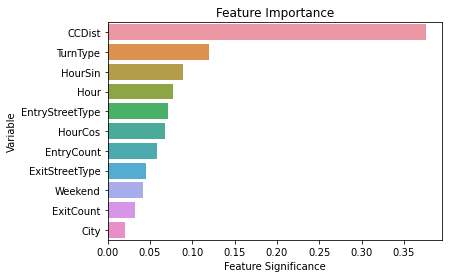

In [72]:
# feature importance
feature_imp = pd.Series(rf_model.feature_importances_, index=_df_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Significance')
plt.ylabel('Variable')
plt.title("Feature Importance")
plt.show()

# Submission test

In [79]:
rf_pred = rf_model.predict(df_test_scaled)

In [80]:
# create TargetId & Target as required by the competition 
rf_submission = pd.DataFrame (rf_pred, columns=range(0,6)).reset_index()
rf_submission = rf_submission.melt(id_vars='index', value_vars=range(0,6), value_name='Target')
rf_submission['TargetId'] = rf_submission['index'].astype(str) + '_' + rf_submission['variable'].astype(str)
rf_submission.sort_values(['index','variable'], inplace=True)
rf_submission.shape

(11528142, 4)

In [81]:
sample = pd.read_csv("./sample_submission.csv")
sample.shape

(11522010, 2)

In [82]:
rf_results = rf_submission.merge(sample[['TargetId']], on='TargetId', how='inner')
rf_results.shape

(11522010, 4)

In [83]:
rf_results[['TargetId','Target']].to_csv('rf_submission.csv', index=False)